# Investment Assignment

In [1]:
#To identify the encoding type import chardet
import chardet

In [2]:
with open("companies.csv","rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


In [3]:
with open("rounds2.csv","rb") as rawdata:
    result=chardet.detect(rawdata.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [4]:
#Import Pandas and numpy
import numpy as np
import pandas as pd

## Checkpoint 1: Data Cleaning 1

In [5]:
#Read Companies CSV
companies = pd.read_csv("companies.csv", encoding="ISO-8859-1")
#Read Rounds CSV
rounds2 = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")

In [6]:
#Checking whether the companies data are properly populated
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [7]:
#Checking whether the Rounds data are properly populated
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### During Step 3 of Checkpoint 1, Got 8 records which has encoding issue. So both the dataframe were encoded and decoded to ascii

In [8]:
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

In [9]:
companies["permalink"]=companies["permalink"].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))                     

#### Change the case of Permalink to Upper case and remove spaces on both the end

In [10]:
companies["permalink"]=companies["permalink"].str.upper().str.strip()

In [11]:
rounds2["company_permalink"]=rounds2["company_permalink"].str.upper().str.strip()

In [12]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [13]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


#### S1: How many unique companies are present in rounds2?

In [14]:
len(pd.unique(rounds2["company_permalink"]))

66368

#### S2: How many unique companies are present in the companies file?

In [15]:
len(pd.unique(companies["permalink"]))

66368

#### S3: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N	

In [16]:
rounds2[~rounds2["company_permalink"].isin(companies["permalink"])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


#### S4: Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 
data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [17]:
rounds2["company_permalink"].str.upper().unique()

array(['/ORGANIZATION/-FAME', '/ORGANIZATION/-QOUNTER',
       '/ORGANIZATION/-THE-ONE-OF-THEM-INC-', ..., '/ORGANIZATION/ERON',
       '/ORGANIZATION/ASYS-2',
       '/ORGANIZATION/NOVATIFF-REKLAM-VE-TANTM-HIZMETLERI-TIC'],
      dtype=object)

In [18]:
#Merge companies and rounds2 files using permalink as key
master_frame=pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')

In [19]:
#Check the data after merging
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [20]:
#Check the shape after merging
master_frame.shape

(114949, 16)

In [21]:
#Drop the permalink, as we have company_permalink
master_frame = master_frame.drop('permalink', axis=1)

In [22]:
#Check the null value percentage of each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [23]:
#Data Cleaning, Remove the higher percentage null value from the dataframe
master_frame = master_frame.drop('funding_round_code', axis=1)

## Checkpoint 2: Funding Type Analysis

#### S1-4: Representative funding amount of venture/angel/seed/private equity type

In [24]:
#1. Representative funding amount of venture type
#2. Representative funding amount of angel type
#3. Representative funding amount of seed type
#4. Representative funding amount of private equity type
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False).apply(lambda x: '%.2f' % x)

funding_round_type
post_ipo_debt            168704571.82
post_ipo_equity           82182493.87
secondary_market          79649630.10
private_equity            73308593.03
undisclosed               19242370.23
debt_financing            17043526.02
venture                   11748949.13
grant                      4300576.34
convertible_note           1453438.54
product_crowdfunding       1363131.07
angel                       958694.47
seed                        719818.00
equity_crowdfunding         538368.21
non_equity_assistance       411203.05
Name: raised_amount_usd, dtype: object

#### S5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [25]:
#Group by Funding Type
df=master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

In [26]:
#Store it in a Dataframe
df_funding_round_type=pd.DataFrame(df)

In [27]:
#As I was getting format issue for the amount value
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [28]:
#Convert the raised amount to Float
df_funding_round_type.astype(float)

,raised_amount_usd
funding_round_type,
post_ipo_debt,168704571.82
post_ipo_equity,82182493.87
secondary_market,79649630.10
private_equity,73308593.03
undisclosed,19242370.23
debt_financing,17043526.02
venture,11748949.13
grant,4300576.34
convertible_note,1453438.54


In [29]:
#Check which funding type is greater than 5million
(df_funding_round_type['raised_amount_usd'] > 5000000.00)

funding_round_type
post_ipo_debt             True
post_ipo_equity           True
secondary_market          True
private_equity            True
undisclosed               True
debt_financing            True
venture                   True
grant                    False
convertible_note         False
product_crowdfunding     False
angel                    False
seed                     False
equity_crowdfunding      False
non_equity_assistance    False
Name: raised_amount_usd, dtype: bool

In [30]:
#Check which funding type is less than 15million
(df_funding_round_type['raised_amount_usd'] < 15000000.00)

funding_round_type
post_ipo_debt            False
post_ipo_equity          False
secondary_market         False
private_equity           False
undisclosed              False
debt_financing           False
venture                   True
grant                     True
convertible_note          True
product_crowdfunding      True
angel                     True
seed                      True
equity_crowdfunding       True
non_equity_assistance     True
Name: raised_amount_usd, dtype: bool

In [31]:
#Combine above two conditions and check which funding type lies between the criteria
(df_funding_round_type['raised_amount_usd'] > 5000000.00) & (df_funding_round_type['raised_amount_usd'] < 15000000.00)

funding_round_type
post_ipo_debt            False
post_ipo_equity          False
secondary_market         False
private_equity           False
undisclosed              False
debt_financing           False
venture                   True
grant                    False
convertible_note         False
product_crowdfunding     False
angel                    False
seed                     False
equity_crowdfunding      False
non_equity_assistance    False
Name: raised_amount_usd, dtype: bool

In [32]:
#Using above condition get the funding type
df_funding_round_type[(df_funding_round_type['raised_amount_usd'] > 5000000.00) & (df_funding_round_type['raised_amount_usd'] < 15000000.00)]

,raised_amount_usd
funding_round_type,
venture,11748949.13


## Checkpoint 3: Country Analysis

#### S1: Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type

In [33]:
#The dervied highest amount funding type related values are extracted and store it in a seperate dataframe
venture_inv_type = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]

In [34]:
venture_inv_type.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### S2: Identify the top three English-speaking countries in the data frame top9.

In [35]:
top9 = pd.DataFrame(venture_inv_type.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False))

In [36]:
top9.head(9).astype(float)

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


## Checkpoint 4: Sector Analysis 1

#### S1: Extract the primary sector of each category list from the category_list column

In [37]:
#Extract the primary sector of each category list from the category_list column
venture_inv_type['primary_sector']=venture_inv_type['category_list'].apply(lambda x: str(x).split('|')[0].upper().strip())

<ipython-input-37-0972034084aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture_inv_type['primary_sector']=venture_inv_type['category_list'].apply(lambda x: str(x).split('|')[0].upper().strip())


In [38]:
venture_inv_type.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,APPS
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE


In [39]:
#Note the shape value, as it will be useful in below steps
venture_inv_type.shape

(55494, 15)

#### S2: Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
#### (Note that ‘Others’ is also considered one of the main sectors)

In [40]:
#Read Mapping CSV file with encoding format as ISO-8859-1
mapping= pd.read_csv("mapping.csv",encoding="ISO-8859-1")

In [41]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [42]:
#In Category List, We have 0 inbetween the text, For correction need to replace with 'na' that makes the sentence correct
#During merging, if it wasnt corrected then we will get different counts
mapping['category_list'] = mapping['category_list'].str.replace('0','na')

In [43]:
#Convert the categorylist to upper case and remove both end spaces if exists
mapping['category_list']=mapping['category_list'].apply(lambda x: str(x).upper().strip())

In [44]:
#Using Melt, transform wide to long format
mapping = mapping.melt(id_vars="category_list",var_name="main_sector")

In [45]:
mapping.head()

,category_list,main_sector,value
0,NAN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D PRINTING,Automotive & Sports,0
3,3D TECHNOLOGY,Automotive & Sports,0
4,ACCOUNTING,Automotive & Sports,0


In [46]:
#Filter only with the value=1
mapping=mapping[mapping['value']==1]

In [47]:
mapping.head()

,category_list,main_sector,value
8,ADVENTURE TRAVEL,Automotive & Sports,1
14,AEROSPACE,Automotive & Sports,1
45,AUTO,Automotive & Sports,1
46,AUTOMATED KIOSK,Automotive & Sports,1
47,AUTOMOTIVE,Automotive & Sports,1


In [48]:
#After formatting, We dont required the value which can be dropped
mapping=mapping.drop('value',axis=1)

In [49]:
#As part of analysis, found that we have a record with "Blanks" 
mapping[mapping.main_sector=="Blanks"]

,category_list,main_sector
688,NAN,Blanks


In [50]:
#Other than Blanks, Loaded into mapping dataframe
mapping=mapping[mapping['main_sector']!="Blanks"]

In [51]:
#To check whether the blanks entry present after removing
mapping[mapping.main_sector=="Blanks"]

,category_list,main_sector


In [52]:
mapping.shape

(687, 2)

#### S3: Merge Venture and Mapping using Primary sector and category list

In [53]:
#Merging Venture Investment and Mapping with CategoryList and Primary Sector
venture_data = pd.merge(venture_inv_type,mapping,how='inner',left_on='primary_sector',right_on='category_list',indicator=True)

In [54]:
venture_data

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,_merge
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,MEDIA,Entertainment,both
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,Entertainment,both
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,Entertainment,both
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,MEDIA,Entertainment,both
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,MEDIA,Entertainment,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54336,/ORGANIZATION/YAPTA,/funding-round/b1777df10578e852be3afbe3bc325435,venture,22-07-2013,4220000.00,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,TRACKING,TRACKING,Others,both
54337,/ORGANIZATION/YAPTA,/funding-round/ed75e1064eb8b50c01c2e0b691ca9f1e,venture,25-06-2009,2000000.00,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,TRACKING,TRACKING,Others,both
54338,/ORGANIZATION/YAPTA,/funding-round/fc066baf3121b060b574214612a6c946,venture,29-07-2015,1786563.00,Yapta,http://www.yapta.com,Tracking|Transportation|Travel,operating,USA,WA,Seattle,Seattle,01-07-2007,TRACKING,TRACKING,Others,both
54339,/ORGANIZATION/ZIFTIT,/funding-round/d5713b26dbc5e0c65ccc426377449435,venture,09-07-2013,4000000.00,Ziftit,http://www.ziftit.com,Gift Registries|Shopping,closed,USA,CA,San Diego,San Diego,01-02-2011,GIFT REGISTRIES,GIFT REGISTRIES,Others,both


In [55]:
#Remove the redundant column from dataframe
venture_data.drop(columns=['category_list_y'],inplace=True)

In [56]:
venture_data.shape

(54341, 17)

## Checkpoint 5: Sector Analysis 2

In [57]:
#For Easy Filtering, Typecasted country code to Upper case
venture_data.country_code=venture_data.country_code.str.upper().str.strip()

#### S1: Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range

In [58]:
#Stored Countrycode=USA in D1 dataframe
D1=venture_data[venture_data.country_code=='USA']

In [59]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,_merge
4,/ORGANIZATION/ALL-DEF-DIGITAL,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,Entertainment,both
5,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,MEDIA,Entertainment,both
6,/ORGANIZATION/AUDIOSOCKET,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,MEDIA,Entertainment,both
7,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,MEDIA,Entertainment,both
8,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,MEDIA,Entertainment,both


In [60]:
#Stored Countrycode=GBR in D2 dataframe
D2=venture_data[venture_data.country_code=='GBR']

In [61]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,_merge
1,/ORGANIZATION/90MIN,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment,both
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment,both
3,/ORGANIZATION/90MIN,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment,both
66,/ORGANIZATION/TEEPIX,/funding-round/71b43b36b581697e603b256a13229994,venture,14-11-2007,1655405.00,Teepix,NaN,Media|Photography|Service Providers,operating,GBR,A5,London,Bedford,NaN,MEDIA,Entertainment,both
102,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,09-07-2014,10000000.00,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,APPLICATION PLATFORMS,"News, Search and Messaging",both


In [62]:
#Stored Countrycode=IND in D3 dataframe
D3=venture_data[venture_data.country_code=='IND']

In [63]:
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,_merge
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,Entertainment,both
32,/ORGANIZATION/MANAS-INFORMATICS,/funding-round/719e50301803d3918ffa558fc877e41c,venture,02-02-2008,160000.00,Manas Informatic,http://www.topnews.in,Media|News,operating,IND,23,Mohali,Mohali,05-05-2007,MEDIA,Entertainment,both
243,/ORGANIZATION/BIRDS-EYE-SYSTEMS,/funding-round/efd4b1671334857feb157972242abf2d,venture,30-09-2014,NaN,Birds Eye Systems,http://birdseyetech.com,Apps|Mobile|Transportation,operating,IND,16,Mumbai,Mumbai,01-01-2010,APPS,"News, Search and Messaging",both
250,/ORGANIZATION/BOBBLE-APP,/funding-round/9697feaa99067a22cd3ae09195001343,venture,05-11-2015,NaN,Bobble App,http://www.bobbleapp.me/,Apps|Mobile|Personalization|Software,operating,IND,7,New Delhi,New Delhi,NaN,APPS,"News, Search and Messaging",both
279,/ORGANIZATION/CHILLR-2,/funding-round/c5477ed0c5d0f47db4d010094abcd317,venture,02-10-2015,6000000.00,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,22-12-2013,APPS,"News, Search and Messaging",both


#### S2: Total number of Investments (count)

In [64]:
#Total number of Investments in USA
D1.shape

(38020, 17)

In [65]:
#Total number of Investments in GBR
D2.shape

(2264, 17)

In [66]:
#Total number of Investments in IND
D3.shape

(984, 17)

#### S3: Total amount of investment (USD)

In [67]:
# Amount of investment (USD) in USA
D1.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).apply(lambda x: '%.2f' % x)

main_sector
Cleantech / Semiconductors                 119931874301.00
Social, Finance, Analytics, Advertising     86331402349.00
Others                                      82796823598.00
News, Search and Messaging                  45600521085.00
Health                                      31675057766.00
Manufacturing                               24845319470.00
Entertainment                               17014560960.00
Automotive & Sports                         11632164696.00
Name: raised_amount_usd, dtype: object

In [68]:
#Total amount of investment (USD) in USA
D1.raised_amount_usd.sum()

419827724225.0

In [69]:
#Amount of investment (USD) in GBR
D2.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).apply(lambda x: '%.2f' % x)

main_sector
Cleantech / Semiconductors                 5073290093.00
Others                                     4492219646.00
Social, Finance, Analytics, Advertising    3773328672.00
News, Search and Messaging                 2956023749.00
Entertainment                              1162564878.00
Health                                     1046654806.00
Manufacturing                              1019283214.00
Automotive & Sports                         480878712.00
Name: raised_amount_usd, dtype: object

In [70]:
#Total amount of investment (USD) in GBR
D2.raised_amount_usd.sum()

20004243770.0

In [71]:
#Amount of investment (USD) in IND
D3.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending = False).apply(lambda x: '%.2f' % x)

main_sector
Others                                     6329507440.00
News, Search and Messaging                 1739579948.00
Social, Finance, Analytics, Advertising    1578804920.00
Automotive & Sports                        1556350000.00
Entertainment                               976191777.00
Cleantech / Semiconductors                  786444633.00
Manufacturing                               730260000.00
Health                                      564370000.00
Name: raised_amount_usd, dtype: object

In [72]:
#Total amount of investment (USD) in IND
D3.raised_amount_usd.sum()

14261508718.0

#### S4: Top Sector name (no. of investment-wise) , Second Sector name (no. of investment-wise) , Third Sector name (no. of investment-wise) , Number of investments in top sector (3), Number of investments in second sector (4) , Number of investments in third sector (5)

In [73]:
#USA Sector Details
D1.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     8763
Cleantech / Semiconductors                 8268
Social, Finance, Analytics, Advertising    7822
Name: main_sector, dtype: int64

In [74]:
#GBR Sector Details
D2.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     580
Social, Finance, Analytics, Advertising    481
Cleantech / Semiconductors                 466
Name: main_sector, dtype: int64

In [75]:
#IND Sector Details
D3.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

main_sector
Others                                     332
Social, Finance, Analytics, Advertising    193
News, Search and Messaging                 154
Name: main_sector, dtype: int64

#### S5: For point 3 (top sector count-wise), which company received the highest investment?

In [76]:
#Company received the 1st highest investment for USA
D1[D1['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/TERASCALA           13
/ORGANIZATION/VECTORMAX           12
/ORGANIZATION/LECERE              11
/ORGANIZATION/BTI-SYSTEMS         10
/ORGANIZATION/DELIVERYAGENT        9
                                  ..
/ORGANIZATION/STUBHUB              0
/ORGANIZATION/BIGMACHINES          0
/ORGANIZATION/BILLS-KHAKIS         0
/ORGANIZATION/BINWISE              0
/ORGANIZATION/004-TECHNOLOGIES     0
Name: raised_amount_usd, Length: 4884, dtype: int64

In [77]:
#Company received the 1st highest investment for GBR
D2[D2['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/ROSTIMA           8
/ORGANIZATION/ELECTRIC-CLOUD    7
/ORGANIZATION/PICOCHIP          6
/ORGANIZATION/HELVETA           6
/ORGANIZATION/CRITICALBLUE      5
                               ..
/ORGANIZATION/E-TRADER-GROUP    0
/ORGANIZATION/USER-REPLAY       0
/ORGANIZATION/DRY-LUBE          0
/ORGANIZATION/DOVETAIL          0
/ORGANIZATION/SPOKE-3           0
Name: raised_amount_usd, Length: 387, dtype: int64

In [78]:
#Company received the 1st highest investment for IND
D3[D3['main_sector']=='Others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/FLIPKART                        9
/ORGANIZATION/MYNTRA                          8
/ORGANIZATION/SNAPDEAL                        5
/ORGANIZATION/CANVERA-DIGITAL-TECHNOLOGIES    5
/ORGANIZATION/TUTORVISTA-COM                  5
                                             ..
/ORGANIZATION/HARNESS-HANDITOUCH              0
/ORGANIZATION/CHUMBAK                         0
/ORGANIZATION/HEALTHKART                      0
/ORGANIZATION/FINDYAHAN                       0
/ORGANIZATION/MAPMYINDIA                      0
Name: raised_amount_usd, Length: 221, dtype: int64

#### S6: For point 4 (second best sector count-wise), which company received the highest investment?

In [79]:
#Company received the 2nd highest investment of Cleantech / Semiconductors for USA
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/TIGO-ENERGY                   12
/ORGANIZATION/AVIIR                         12
/ORGANIZATION/PRO-PHARMACEUTICALS           12
/ORGANIZATION/COVENANT-SURGICAL-PARTNERS    12
/ORGANIZATION/CNS-RESPONSE                  11
                                            ..
/ORGANIZATION/GENABILITY                     0
/ORGANIZATION/NOTABLE-LABS-2                 0
/ORGANIZATION/PHYSICIANS-IMMEDIATE-CARE      0
/ORGANIZATION/NEUROSKY                       0
/ORGANIZATION/WATER-GENERATING-SYSTEMS       0
Name: raised_amount_usd, Length: 3930, dtype: int64

In [80]:
#Company received the 2nd highest investment of Social, Finance, Analytics, Advertising for GBR
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/SIMILARWEB             6
/ORGANIZATION/WORLDREMIT             6
/ORGANIZATION/BORRO                  5
/ORGANIZATION/AD-IQ                  5
/ORGANIZATION/SPORTPURSUIT           5
                                    ..
/ORGANIZATION/TOUCHLOCAL             0
/ORGANIZATION/PHOTOSPOTLAND          0
/ORGANIZATION/PERFECT-STORM-MEDIA    0
/ORGANIZATION/TRIGGERTRAP            0
/ORGANIZATION/POINTR                 0
Name: raised_amount_usd, Length: 313, dtype: int64

In [81]:
#Company received the 2nd highest investment of Social, Finance, Analytics, Advertising for IND
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False)

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS    6
/ORGANIZATION/POLICYBAZAAR       4
/ORGANIZATION/SHOPCLUES-COM      4
/ORGANIZATION/KOMLI-MEDIA        4
/ORGANIZATION/VIZURY             3
                                ..
/ORGANIZATION/FINDABLE-IN        0
/ORGANIZATION/FAIRCENT           0
/ORGANIZATION/EMPOWER-FUTURES    0
/ORGANIZATION/SIMPLI5D           0
/ORGANIZATION/JOMBAY             0
Name: raised_amount_usd, Length: 141, dtype: int64

## Checkpoint 6: Plots

In [82]:
#For Plotting Bar Chart Importing below libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### S1: A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [83]:
#To Identify Unique Funding Type and If we plot against raise amount, getting different result. 
#So took only 'venture', 'angel', 'seed', 'private_equity'
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

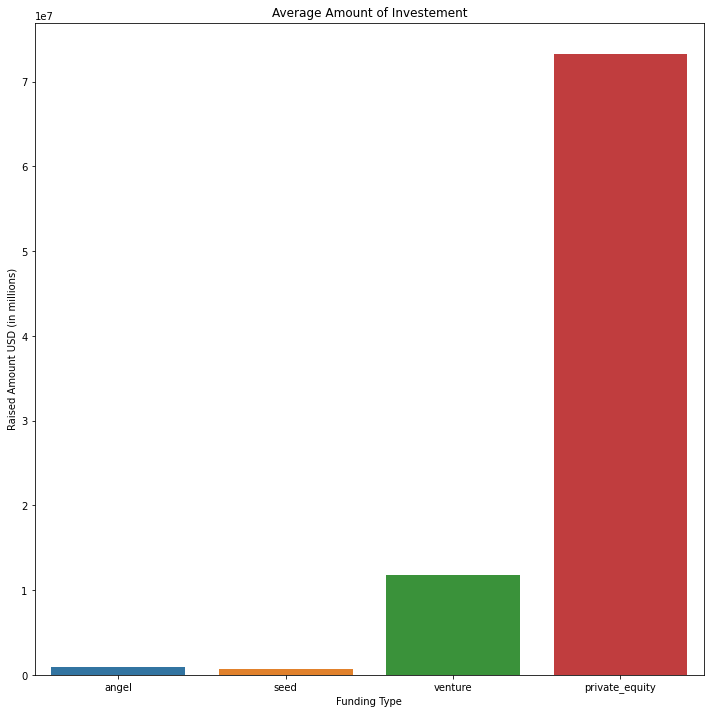

In [84]:
# Assigning size for the plot
plt.subplots(figsize=(12,12))
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd'],estimator=np.mean,order=['angel', 'seed','venture', 'private_equity'],ci=None)
plt.ylabel("Raised Amount USD (in millions)")
plt.xlabel("Funding Type")
plt.title("Average Amount of Investement") 
plt.show()

#### S2: A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 

In [85]:
#Use the earlier create datframe for analysis
top9

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
...,...
MKD,0.00
PSE,0.00
BHR,0.00


In [86]:
#Filter only the First 9 countries
top9New=top9.head(9).reset_index(inplace=False)

In [87]:
top9New.head()

,country_code,raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00


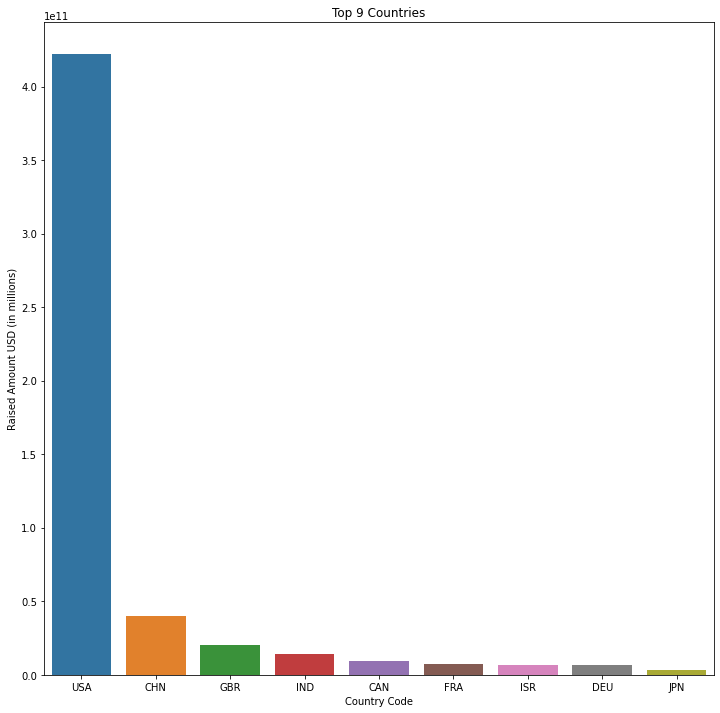

In [88]:
#Based on the 9 countries plot it against the raised amount
plt.subplots(figsize=(12,12))
sns.barplot(x=top9New['country_code'],y=top9New['raised_amount_usd'],estimator=np.mean,order=top9New['country_code'],ci=None)
plt.ylabel("Raised Amount USD (in millions)")
plt.xlabel("Country Code")
plt.title("Top 9 Countries") 
plt.show()

#### S3: A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [89]:
#Take first top three entries of the USA Main sector
USA_VAL=D1.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3)

In [90]:
#Load the value into dataframe for easy calculation
USA=pd.DataFrame(USA_VAL)

In [91]:
#Rename the column to count, as both the columns heading are same. While resetting we are getting error.
#to prevent that column name has been changed
USA.columns=['Count']

In [92]:
USA

,Count
main_sector,
Others,8763
Cleantech / Semiconductors,8268
"Social, Finance, Analytics, Advertising",7822


In [93]:
#Resetting the index
USA.reset_index(inplace=True)

In [94]:
USA

,main_sector,Count
0,Others,8763
1,Cleantech / Semiconductors,8268
2,"Social, Finance, Analytics, Advertising",7822


In [95]:
#Create a new column as country and store USA for the top 3 sectors 
USA['Country']='USA'

In [96]:
USA

,main_sector,Count,Country
0,Others,8763,USA
1,Cleantech / Semiconductors,8268,USA
2,"Social, Finance, Analytics, Advertising",7822,USA


In [97]:
#Take first top three entries of the GBR Main sector and load it into dataframe
GBR=pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3))

In [98]:
GBR

,main_sector
main_sector,
Others,580
"Social, Finance, Analytics, Advertising",481
Cleantech / Semiconductors,466


In [99]:
#Rename the column to count, as both the columns heading are same. While resetting we are getting error.
#to prevent that column name has been changed
GBR.columns=['Count']

In [100]:
#Resetting the index
GBR.reset_index(inplace=True)

In [101]:
#Create a new column as country and store GBR for the top 3 sectors 
GBR['Country']='GBR'

In [102]:
GBR

,main_sector,Count,Country
0,Others,580,GBR
1,"Social, Finance, Analytics, Advertising",481,GBR
2,Cleantech / Semiconductors,466,GBR


In [103]:
#Take first top three entries of the IND Main sector and load it into dataframe
IND=pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(3))

In [104]:
#Rename the column to count, as both the columns heading are same. While resetting we are  getting error.
#to prevent that column name has been changed
IND.columns=['Count']

In [105]:
#Resetting the index
IND.reset_index(inplace=True)

In [106]:
#Create a new column as country and store IND for the top 3 sectors 
IND['Country']='IND'

In [107]:
IND

,main_sector,Count,Country
0,Others,332,IND
1,"Social, Finance, Analytics, Advertising",193,IND
2,"News, Search and Messaging",154,IND


In [108]:
#Load the Three Countries sector
sector3Frame=[USA,GBR,IND]

In [109]:
#Combine Three Countries sector
sector3=pd.concat(sector3Frame)

In [110]:
sector3

,main_sector,Count,Country
0,Others,8763,USA
1,Cleantech / Semiconductors,8268,USA
2,"Social, Finance, Analytics, Advertising",7822,USA
0,Others,580,GBR
1,"Social, Finance, Analytics, Advertising",481,GBR
2,Cleantech / Semiconductors,466,GBR
0,Others,332,IND
1,"Social, Finance, Analytics, Advertising",193,IND
2,"News, Search and Messaging",154,IND


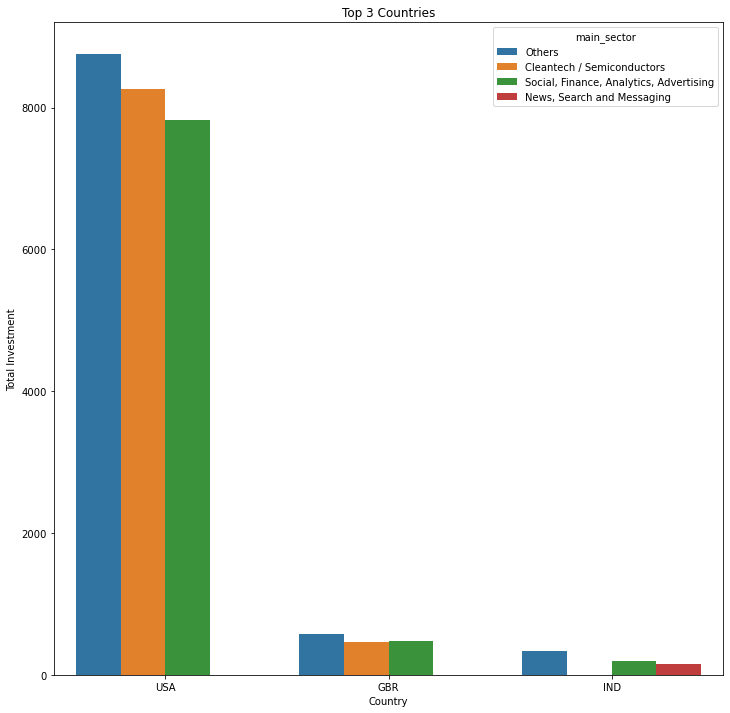

In [111]:
#Using concatinated sector, Plot Country against Count to get Top 3 Sector of the Top 3 Countries
plt.subplots(figsize=(12,12))
sns.barplot(x='Country', y='Count', hue='main_sector',data=sector3)
plt.ylabel("Total Investment")
plt.title("Top 3 Countries") 
plt.show()